# Introduction to Supervised Machine Learning

## Gradient Descent

In [8]:
# Gradient Descent 

## Linear Regression

In [9]:
# Linear Regression

## Utility Functions

In [1]:
import numpy as np

def accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    return tp / (tp + fp) if (tp + fp) != 0 else 0.0

def recall(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp / (tp + fn) if (tp + fn) != 0 else 0.0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) != 0 else 0.0


## Logistic Regression

Logistic regression is a discriminative model used for binary classification tasks. It directly estimates the probability of an outcome given the input features, focusing on modeling the relationship between inputs and the target without assuming any specific distribution of the features. It uses the logistic sigmoid function to convert linear combinations of features into probabilities between 0 and 1. Logistic regression assumes a linear decision boundary separating classes and optimizes its parameters by maximizing the likelihood of the observed data. Unlike generative models like Naive Bayes, logistic regression does not require feature independence and tends to perform well even when features are correlated. It is valued for its simplicity, interpretability, and efficiency in practical classification problems.

In [4]:
# implementation of logistic regression

import time
from tqdm import trange, tqdm

class LogisticRegression():
    def __init__(self, lr=0.001, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500) # avoid overflow
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1-eps) # avoid log(0)
        loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return np.mean(loss)
    
    def compute_predictions(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def compute_gradients(self, X, y_true, y_pred):
        if len(y_true) != len(y_pred):
            raise ValueError("y_true and y_pred must have the same length")
            
        errors = y_pred - y_true
        dw = np.dot(X.T, errors) / X.shape[0]
        db = np.mean(errors)
        return dw, db
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        start_time = time.time()
        
        for epoch in trange(self.epochs, desc="Custom Logistic Regression Training Progress"):
            predictions = self.compute_predictions(X)
            loss = self.compute_loss(y, predictions)
            dw, db = self.compute_gradients(X, y, predictions)

            self.weights -= self.lr * dw
            self.bias   -= self.lr * db

            if epoch in {0, self.epochs - 1} or (epoch + 1) % 100 == 0:
                print(f"[Epoch {epoch + 1}/{self.epochs}] Loss: {loss:.6f}")

        end_time = time.time()
        tqdm.write(f"Training completed in {end_time - start_time:.2f} seconds.")

    def predict(self, X, threshold=0.5):
        predictions = self.compute_predictions(X)
        return (predictions >= threshold).astype(int)
    

### Testing Logistic Regression

Custom Logistic Regression Training Progress: 100%|█████████████████████████| 1000/1000 [00:00<00:00, 20530.93it/s]

[Epoch 1/1000] Loss: 0.693147
[Epoch 100/1000] Loss: 0.255312
[Epoch 200/1000] Loss: 0.192116
[Epoch 300/1000] Loss: 0.163552
[Epoch 400/1000] Loss: 0.146604
[Epoch 500/1000] Loss: 0.135133
[Epoch 600/1000] Loss: 0.126727
[Epoch 700/1000] Loss: 0.120234
[Epoch 800/1000] Loss: 0.115026
[Epoch 900/1000] Loss: 0.110729
[Epoch 1000/1000] Loss: 0.107107
Training completed in 0.05 seconds.


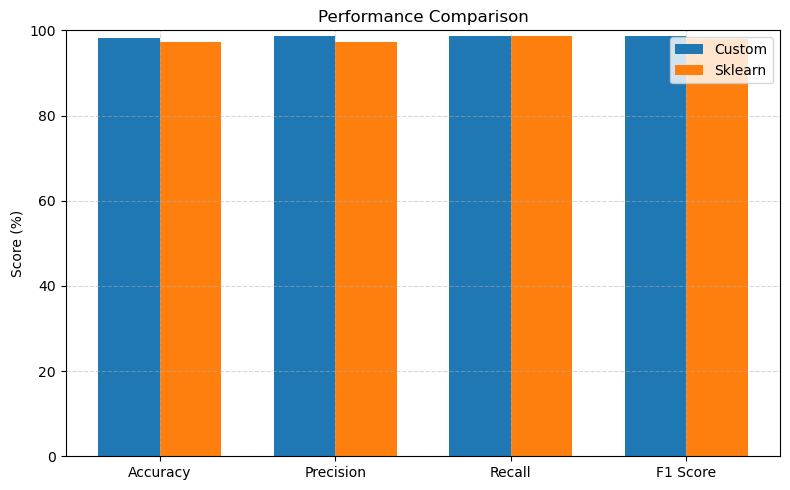

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = load_breast_cancer()
X_raw = data.data.tolist()
y = data.target.tolist()

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw).tolist()
X_test = scaler.transform(X_test_raw).tolist()

clf = LogisticRegression(lr=0.01)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

sk_clf = SklearnLogisticRegression()
sk_clf.fit(X_train, y_train)
sk_clf_pred = sk_clf.predict(X_test)

custom_metrics = {
    "Accuracy": accuracy(y_test, clf_pred),
    "Precision": precision(y_test, clf_pred),
    "Recall": recall(y_test, clf_pred),
    "F1 Score": f1_score(y_test, clf_pred)
}

sklearn_metrics = {
    "Accuracy": accuracy_score(y_test, sk_clf_pred),
    "Precision": precision_score(y_test, sk_clf_pred),
    "Recall": recall_score(y_test, sk_clf_pred),
    "F1 Score": f1_score(y_test, sk_clf_pred)
}

labels = list(custom_metrics.keys())
custom_values = [custom_metrics[k] * 100 for k in labels]
sklearn_values = [sklearn_metrics[k] * 100 for k in labels]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], custom_values, width=width, label='Custom')
plt.bar([i + width/2 for i in x], sklearn_values, width=width, label='Sklearn')

plt.ylabel('Score (%)')
plt.title('Performance Comparison')
plt.xticks(x, labels)
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Naive Bayes

Naive Bayes is a generative probabilistic model used for classification tasks, which works by modeling the joint probability distribution of the input features and the target class. It applies Bayes' theorem with the strong assumption that features are conditionally independent given the class label, simplifying the computation of the likelihood. This assumption often makes Naive Bayes computationally efficient and effective, especially for high-dimensional data or when training data is limited. Unlike logistic regression, which directly models the posterior probability, Naive Bayes models the underlying distribution of each class and uses this to infer class membership. While this independence assumption can limit its accuracy when features are highly correlated, Naive Bayes tends to perform surprisingly well in many real-world scenarios, particularly in text classification and spam filtering. Its generative nature also allows it to handle missing data gracefully and requires fewer training samples to estimate parameters compared to discriminative models like logistic regression.

In [12]:
import numpy as np
from collections import defaultdict

class NaiveBayes():
    def __init__(self, var_smoothing=1e-09):
        self._classes = None
        self._mean = None
        self._var = None
        self._priors = None
        self._var_smoothing = var_smoothing
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        self._classes = np.unique(y)
        n_classes = len(self._classes)
        n_samples, n_features = X.shape

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx] = np.mean(X_c, axis=0)
            self._var[idx] = np.var(X_c, axis=0) + self._var_smoothing
            self._priors[idx] = X_c.shape[0] / n_samples

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
            
    def _predict(self, x):
        posteriors = []

        for idx, _ in enumerate(self._classes):
            prior_log = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior_log + class_conditional
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

### Testing Naive Bayes

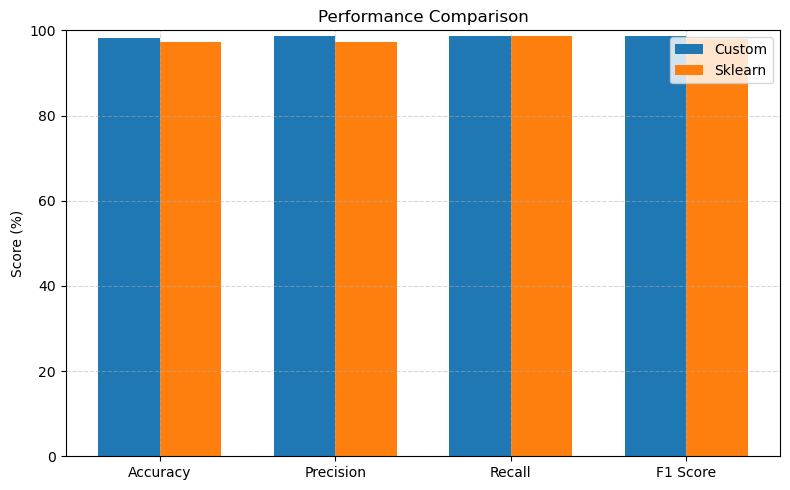

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = load_breast_cancer()
X_raw = data.data.tolist()
y = data.target.tolist()

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw).tolist()
X_test = scaler.transform(X_test_raw).tolist()

nb = NaiveBayes()
nb.fit(X_train, y_train)
nb_pred = clf.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = sk_clf.predict(X_test)

custom_metrics = {
    "Accuracy": accuracy(y_test, nb_pred),
    "Precision": precision(y_test, nb_pred),
    "Recall": recall(y_test, nb_pred),
    "F1 Score": f1_score(y_test, nb_pred)
}

sklearn_metrics = {
    "Accuracy": accuracy_score(y_test, gnb_pred),
    "Precision": precision_score(y_test, gnb_pred),
    "Recall": recall_score(y_test, gnb_pred),
    "F1 Score": f1_score(y_test, gnb_pred)
}

labels = list(custom_metrics.keys())
custom_values = [custom_metrics[k] * 100 for k in labels]
sklearn_values = [sklearn_metrics[k] * 100 for k in labels]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], custom_values, width=width, label='Custom')
plt.bar([i + width/2 for i in x], sklearn_values, width=width, label='Sklearn')

plt.ylabel('Score (%)')
plt.title('Performance Comparison')
plt.xticks(x, labels)
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()